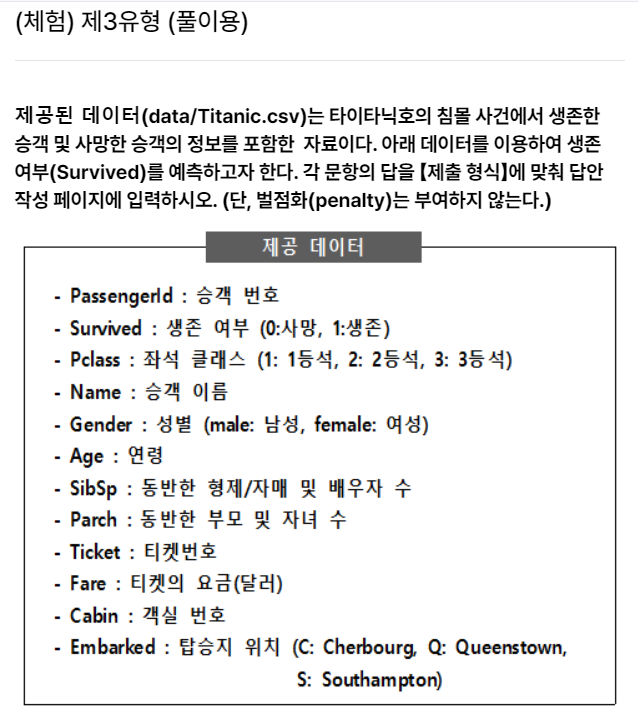
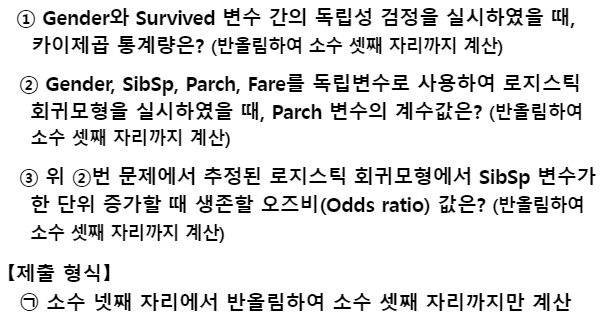

In [5]:
import pandas as pd

df = pd.read_csv("../data/Titanic.csv")
# 1. Gender와 Survived 변수 간 독립성 검정에서 카이제곱 통계량

# 데이터를 테이블로 만들기
# 범수형: pd.crosstab
# 연속형: np.array
table = pd.crosstab(df['Gender'], df['Survived'])
print(table, end='\n\n')

# 카이제곱 검정
from scipy.stats import chi2_contingency

chi2, p_val, dof, exp = chi2_contingency(table)
print(round(chi2,3)) #결과: 260.717
print(p_val) #p_val < 0.05이므로 귀무 가설 기각 

Survived    0    1
Gender            
female     81  233
male      468  109

260.717
1.1973570627755645e-58


In [9]:
# 2. Gender, SibSp, Parch, Fare를 독립변수로 사용해 로지스틱 회귀모형을 실시, 이 때의 Parch 변수의 계수값
from statsmodels.formula.api import logit
result = logit('Survived ~ Gender + SibSp + Parch + Fare', data=df).fit()
print(result.summary())
print(result.params['Parch'])
# Parch의 coef가 -0.2007인 걸 확인할 수 있음

print(round(result.params['Parch'], 3))

Optimization terminated successfully.
         Current function value: 0.482065
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.2761
Time:                        14:26:23   Log-Likelihood:                -429.52
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.192e-69
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9466      0.169      5.590      0.000       0.615       1.279
Gender[T.male]   

In [13]:
import numpy as np
result2=logit('Survived ~ Gender+SibSp+Parch+Fare', data=df).fit().params
print(result2, end='\n\n')
print(np.exp(result2['SibSp']))
print(round(np.exp(result2['SibSp']), 3))

Optimization terminated successfully.
         Current function value: 0.482065
         Iterations 6
Intercept         0.946635
Gender[T.male]   -2.642219
SibSp            -0.353892
Parch            -0.200724
Fare              0.014685
dtype: float64

0.7019508186162718
0.702
